This a ML based solution for a problem given in an AI contest organised by METI, funded by Government of Japan.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as san

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/synthetic_wtp_laptop_data.csv")
df.head()

,Memory,Storage,CPU_class,Screen_size,year,price
0,8,1024,3,16.0,2025,162021
1,32,1024,0,16.0,2024,112214
2,16,512,1,16.0,2025,118354
3,16,1024,1,16.0,2025,123383
4,16,256,3,16.0,2024,162968


In [31]:
df.shape

(1000, 6)

In [32]:
print(df.isnull().sum())

Memory         0
Storage        0
CPU_class      0
Screen_size    0
year           0
price          0
dtype: int64


Text(0.5, 1.0, 'Correlations Between Variables')

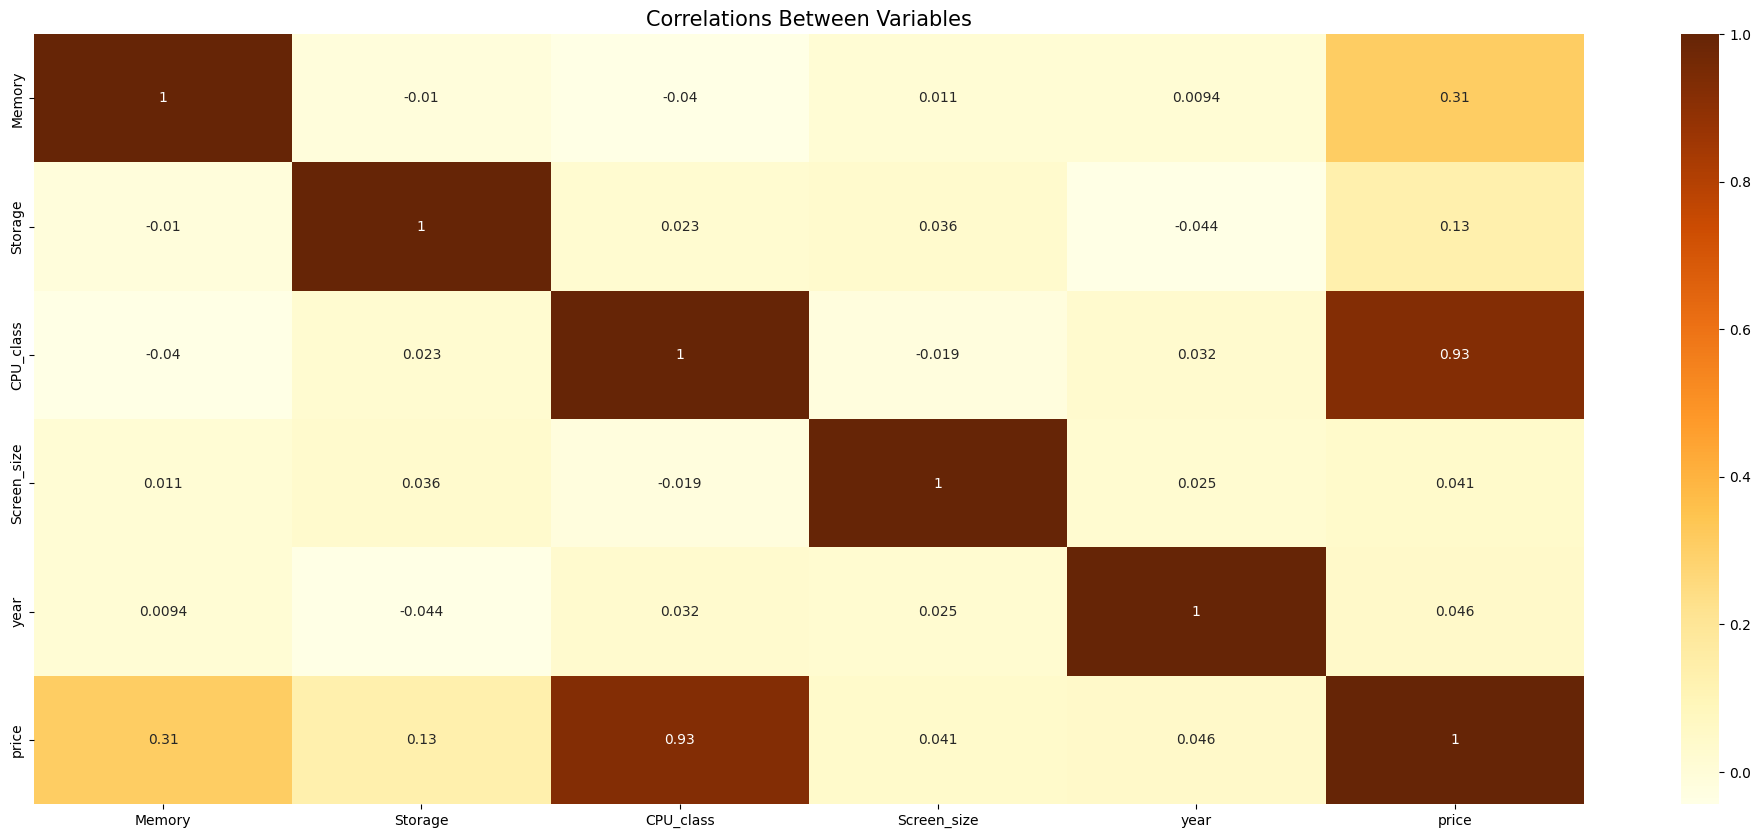

In [33]:
plt.figure(figsize=(25,10))

san.heatmap(df.corr(), cmap ='YlOrBr', annot=True)
plt.title("Correlations Between Variables",size=15)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features = ['Memory', 'Storage', 'CPU_class', 'Screen_size']
X = df[features]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients (how much each feature affects price)
for name, coef in zip(features, model.coef_):
    print(f"{name}: {coef:.2f} yen increase per unit")


Memory: 1127.42 yen increase per unit
Storage: 11.49 yen increase per unit
CPU_class: 26951.55 yen increase per unit
Screen_size: 1973.22 yen increase per unit


In [35]:
base = {
    'Memory': 16,
    'Storage': 512,
    'CPU_class': 1,
    'Screen_size': 14.0
}
base_price = 111000

# Define 4 upgrade options Based on provided requirements
upgrades = [
    {'name': 'Add 16GB Memory', 'change': {'Memory': 32}, 'cost': 7000},
    {'name': 'Add 512GB Storage', 'change': {'Storage': 1024}, 'cost': 5000},
    {'name': 'Upgrade CPU_class', 'change': {'CPU_class': 2}, 'cost': 15000},
    {'name': 'Increase Screen_size to 16"', 'change': {'Screen_size': 16.0}, 'cost': 3000}
]

# Evaluate each upgrade
results = []

for upgrade in upgrades:
    # Create a copy of base specs
    test_spec = base.copy()
    # Apply the upgrade
    test_spec.update(upgrade['change'])
    # Predict the new price using your trained model
    input_df = pd.DataFrame([test_spec])
    predicted_price = model.predict(input_df)[0]
    # Calculate gross profit
    gross_profit = predicted_price - base_price - upgrade['cost']
    results.append({
        'Upgrade': upgrade['name'],
        'Predicted Price': predicted_price,
        'Gross Profit': gross_profit
    })

# Convert to DataFrame and sort by profit
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Gross Profit', ascending=False)

# Display results
print("🔍 Simulation Results (Sorted by Gross Profit):")
print(results_df)


🔍 Simulation Results (Sorted by Gross Profit):
                       Upgrade  Predicted Price  Gross Profit
2            Upgrade CPU_class    137367.132902  11367.132902
0              Add 16GB Memory    128454.281088  10454.281088
3  Increase Screen_size to 16"    114362.026468    362.026468
1            Add 512GB Storage    116298.008016    298.008016


In [36]:
top_2 = results_df.head(2)
print("\n🏆 Top 2 Most Profitable Upgrades:")
print(top_2)



🏆 Top 2 Most Profitable Upgrades:
             Upgrade  Predicted Price  Gross Profit
2  Upgrade CPU_class    137367.132902  11367.132902
0    Add 16GB Memory    128454.281088  10454.281088
